In [45]:
1+1

2

In [46]:
#Loading the dataset
import pandas as pd
import os

In [47]:
%pwd

'D:\\Neeraj_Dixit\\Projects\\Calorie_pred'

In [48]:
os.chdir("D:/Neeraj_Dixit/Projects/Calorie_pred/")
%pwd

'D:\\Neeraj_Dixit\\Projects\\Calorie_pred'

In [49]:
df= pd.read_csv("train.csv")

In [50]:
df.head()

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,male,36,189.0,82.0,26.0,101.0,41.0,150.0
1,1,female,64,163.0,60.0,8.0,85.0,39.7,34.0
2,2,female,51,161.0,64.0,7.0,84.0,39.8,29.0
3,3,male,20,192.0,90.0,25.0,105.0,40.7,140.0
4,4,female,38,166.0,61.0,25.0,102.0,40.6,146.0


In [51]:
df.isnull().sum()

id            0
Sex           0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [52]:
df["Sex"].unique()

array(['male', 'female'], dtype=object)

In [53]:
df['Sex'].value_counts()

Sex
female    375721
male      374279
Name: count, dtype: int64

In [54]:
import matplotlib.pyplot as plt
#plt.scatter(df['Calories'],df['Sex']) 

In [55]:
df.describe()

,id,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
mean,374999.500000,41.420404,174.697685,75.145668,15.421015,95.483995,40.036253,88.282781
std,216506.495284,15.175049,12.824496,13.982704,8.354095,9.449845,0.779875,62.395349
min,0.000000,20.000000,126.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,187499.750000,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,34.000000
50%,374999.500000,40.000000,174.000000,74.000000,15.000000,95.000000,40.300000,77.000000
75%,562499.250000,52.000000,185.000000,87.000000,23.000000,103.000000,40.700000,136.000000
max,749999.000000,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [56]:
import seaborn as sns

In [57]:
df.drop('id', axis=1,inplace=True)

<Axes: ylabel='Age'>

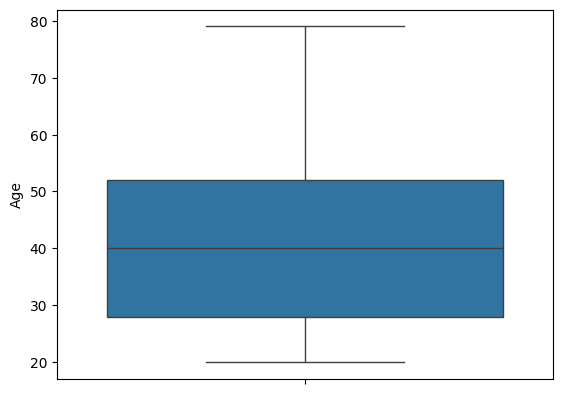

In [58]:
sns.boxplot(df['Age'])

## Data Encoding

#One Hot Encoding

In [59]:
from sklearn.preprocessing import OneHotEncoder

In [60]:
##Create an intance of one hot encoder
encoder=OneHotEncoder()
##perform fit and transform
encoded=encoder.fit_transform(df[['Sex']]).toarray()

In [61]:
df.head(10)

,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,male,36,189.0,82.0,26.0,101.0,41.0,150.0
1,female,64,163.0,60.0,8.0,85.0,39.7,34.0
2,female,51,161.0,64.0,7.0,84.0,39.8,29.0
3,male,20,192.0,90.0,25.0,105.0,40.7,140.0
4,female,38,166.0,61.0,25.0,102.0,40.6,146.0
5,female,26,156.0,56.0,19.0,100.0,40.5,103.0
6,female,21,172.0,73.0,3.0,81.0,38.3,9.0
7,male,46,188.0,94.0,23.0,100.0,40.8,145.0
8,female,33,166.0,63.0,25.0,107.0,40.5,161.0
9,male,65,185.0,88.0,23.0,104.0,41.0,185.0


In [62]:
encoder_df=pd.DataFrame(encoded,columns=encoder.get_feature_names_out())

In [63]:
encoder_df.head(100)

,Sex_female,Sex_male
0,0.0,1.0
1,1.0,0.0
2,1.0,0.0
3,0.0,1.0
4,1.0,0.0
...,...,...
95,0.0,1.0
96,0.0,1.0
97,1.0,0.0
98,1.0,0.0


In [64]:
onehot_df=pd.concat([encoder_df,df],axis=1)

In [65]:
onehot_df.drop("Sex", axis=1,inplace=True)

In [66]:
onehot_df.head(10)

,Sex_female,Sex_male,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0.0,1.0,36,189.0,82.0,26.0,101.0,41.0,150.0
1,1.0,0.0,64,163.0,60.0,8.0,85.0,39.7,34.0
2,1.0,0.0,51,161.0,64.0,7.0,84.0,39.8,29.0
3,0.0,1.0,20,192.0,90.0,25.0,105.0,40.7,140.0
4,1.0,0.0,38,166.0,61.0,25.0,102.0,40.6,146.0
5,1.0,0.0,26,156.0,56.0,19.0,100.0,40.5,103.0
6,1.0,0.0,21,172.0,73.0,3.0,81.0,38.3,9.0
7,0.0,1.0,46,188.0,94.0,23.0,100.0,40.8,145.0
8,1.0,0.0,33,166.0,63.0,25.0,107.0,40.5,161.0
9,0.0,1.0,65,185.0,88.0,23.0,104.0,41.0,185.0


# Exploratory Data Analysis

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Sex         750000 non-null  object 
 1   Age         750000 non-null  int64  
 2   Height      750000 non-null  float64
 3   Weight      750000 non-null  float64
 4   Duration    750000 non-null  float64
 5   Heart_Rate  750000 non-null  float64
 6   Body_Temp   750000 non-null  float64
 7   Calories    750000 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 45.8+ MB


In [68]:
df.describe()

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
mean,41.420404,174.697685,75.145668,15.421015,95.483995,40.036253,88.282781
std,15.175049,12.824496,13.982704,8.354095,9.449845,0.779875,62.395349
min,20.000000,126.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,34.000000
50%,40.000000,174.000000,74.000000,15.000000,95.000000,40.300000,77.000000
75%,52.000000,185.000000,87.000000,23.000000,103.000000,40.700000,136.000000
max,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [69]:
df.shape

(750000, 8)

In [70]:
df["Age"].unique()

array([36, 64, 51, 20, 38, 26, 21, 46, 33, 65, 41, 25, 57, 44, 27, 48, 32,
       72, 45, 22, 54, 40, 42, 43, 53, 31, 47, 71, 61, 78, 50, 35, 34, 62,
       79, 23, 28, 39, 37, 29, 24, 68, 58, 67, 75, 30, 60, 59, 70, 55, 77,
       49, 66, 56, 52, 73, 69, 74, 76, 63])

In [71]:
#Duplicates records
df[df.duplicated()]

,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
11643,female,54,161.0,61.0,14.0,95.0,40.3,76.0
18100,female,54,161.0,61.0,9.0,88.0,39.7,42.0
22070,male,51,187.0,94.0,3.0,81.0,38.8,10.0
26664,female,67,169.0,69.0,24.0,104.0,40.7,161.0
31062,female,40,161.0,58.0,14.0,90.0,40.4,64.0
...,...,...,...,...,...,...,...,...
749584,female,39,161.0,61.0,13.0,99.0,40.3,74.0
749823,female,29,173.0,68.0,14.0,95.0,40.2,67.0
749852,male,21,187.0,90.0,9.0,91.0,39.7,30.0
749889,male,40,191.0,88.0,5.0,86.0,39.0,18.0


In [72]:
df.drop_duplicates(inplace=True)

In [73]:
#corelation
onehot_df.corr()

,Sex_female,Sex_male,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
Sex_female,1.000000,-1.000000,-0.009689,-0.755906,-0.818250,0.009594,-0.009122,0.015933,-0.012011
Sex_male,-1.000000,1.000000,0.009689,0.755906,0.818250,-0.009594,0.009122,-0.015933,0.012011
Age,-0.009689,0.009689,1.000000,0.011975,0.073690,0.015656,0.017037,0.030275,0.145683
Height,-0.755906,0.755906,0.011975,1.000000,0.957967,-0.029936,-0.013234,-0.034641,-0.004026
Weight,-0.818250,0.818250,0.073690,0.957967,1.000000,-0.020845,-0.002384,-0.023717,0.015863
Duration,0.009594,-0.009594,0.015656,-0.029936,-0.020845,1.000000,0.875327,0.903066,0.959908
Heart_Rate,-0.009122,0.009122,0.017037,-0.013234,-0.002384,0.875327,1.000000,0.795972,0.908748
Body_Temp,0.015933,-0.015933,0.030275,-0.034641,-0.023717,0.903066,0.795972,1.000000,0.828671
Calories,-0.012011,0.012011,0.145683,-0.004026,0.015863,0.959908,0.908748,0.828671,1.000000


In [74]:
import seaborn as sns
#sns.heatmap(onehot_df.corr(),annot=True)

In [75]:
import matplotlib.pyplot as plt
#plt.Figure(figsize=(7,60))
#sns.heatmap(onehot_df.corr(),annot=True)

In [76]:
df["Sex"].value_counts()

Sex
female    374290
male      372869
Name: count, dtype: int64

<Axes: xlabel='Age', ylabel='Count'>

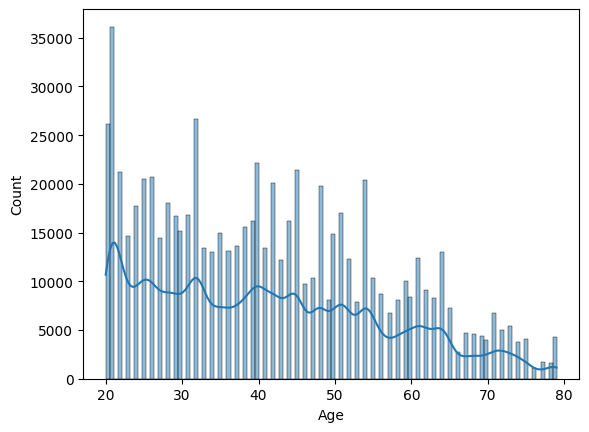

In [77]:
sns.histplot(df["Age"],kde=True)

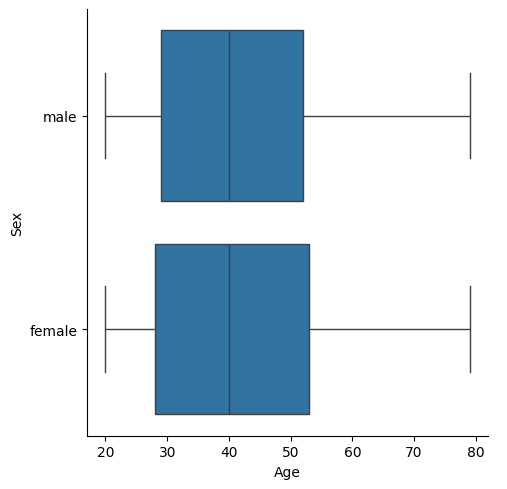

In [78]:
#Categorical Plot
sns.catplot(x="Age",y="Sex",data=df,kind='box')

In [79]:
#sns.scatterplot(x="Age",y="Heart_Rate",hue="Sex",data=df)

In [80]:
onehot_df[onehot_df.duplicated]

,Sex_female,Sex_male,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
11643,1.0,0.0,54,161.0,61.0,14.0,95.0,40.3,76.0
18100,1.0,0.0,54,161.0,61.0,9.0,88.0,39.7,42.0
22070,0.0,1.0,51,187.0,94.0,3.0,81.0,38.8,10.0
26664,1.0,0.0,67,169.0,69.0,24.0,104.0,40.7,161.0
31062,1.0,0.0,40,161.0,58.0,14.0,90.0,40.4,64.0
...,...,...,...,...,...,...,...,...,...
749584,1.0,0.0,39,161.0,61.0,13.0,99.0,40.3,74.0
749823,1.0,0.0,29,173.0,68.0,14.0,95.0,40.2,67.0
749852,0.0,1.0,21,187.0,90.0,9.0,91.0,39.7,30.0
749889,0.0,1.0,40,191.0,88.0,5.0,86.0,39.0,18.0


In [81]:
onehot_df.drop_duplicates(inplace=True)

In [82]:
onehot_df[onehot_df.duplicated]

,Sex_female,Sex_male,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories


In [83]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [84]:
onehot_df.head(10)

,Sex_female,Sex_male,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0.0,1.0,36,189.0,82.0,26.0,101.0,41.0,150.0
1,1.0,0.0,64,163.0,60.0,8.0,85.0,39.7,34.0
2,1.0,0.0,51,161.0,64.0,7.0,84.0,39.8,29.0
3,0.0,1.0,20,192.0,90.0,25.0,105.0,40.7,140.0
4,1.0,0.0,38,166.0,61.0,25.0,102.0,40.6,146.0
5,1.0,0.0,26,156.0,56.0,19.0,100.0,40.5,103.0
6,1.0,0.0,21,172.0,73.0,3.0,81.0,38.3,9.0
7,0.0,1.0,46,188.0,94.0,23.0,100.0,40.8,145.0
8,1.0,0.0,33,166.0,63.0,25.0,107.0,40.5,161.0
9,0.0,1.0,65,185.0,88.0,23.0,104.0,41.0,185.0


In [85]:
X=onehot_df.iloc[:,:-1]
y=onehot_df.iloc[:,-1]

In [86]:
X

,Sex_female,Sex_male,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,0.0,1.0,36,189.0,82.0,26.0,101.0,41.0
1,1.0,0.0,64,163.0,60.0,8.0,85.0,39.7
2,1.0,0.0,51,161.0,64.0,7.0,84.0,39.8
3,0.0,1.0,20,192.0,90.0,25.0,105.0,40.7
4,1.0,0.0,38,166.0,61.0,25.0,102.0,40.6
...,...,...,...,...,...,...,...,...
749995,0.0,1.0,28,193.0,97.0,30.0,114.0,40.9
749996,1.0,0.0,64,165.0,63.0,18.0,92.0,40.5
749997,0.0,1.0,60,162.0,67.0,29.0,113.0,40.9
749998,0.0,1.0,45,182.0,91.0,17.0,102.0,40.3


In [87]:
y

0         150.0
1          34.0
2          29.0
3         140.0
4         146.0
          ...  
749995    230.0
749996     96.0
749997    221.0
749998    109.0
749999    103.0
Name: Calories, Length: 747159, dtype: float64

In [88]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [93]:
sns.regplot(onehot_df['Heart_Rate'],onehot_df['Calories'])

TypeError: regplot() takes from 0 to 1 positional arguments but 2 were given

In [94]:
from sklearn.preprocessing import StandardScaler

In [95]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [98]:
X_train

array([[-1.00104807,  1.00104807,  0.5642252 , ...,  1.38361875,
         1.00497529,  0.72198125],
       [ 0.99895302, -0.99895302, -1.08256918, ...,  0.30701875,
        -0.68605293,  0.59380534],
       [-1.00104807,  1.00104807, -1.0166974 , ...,  1.38361875,
         1.21635382,  1.10650896],
       ...,
       [ 0.99895302, -0.99895302, -0.2262361 , ...,  1.50324098,
         0.79359676,  0.85015715],
       [-1.00104807,  1.00104807, -0.2262361 , ...,  0.30701875,
         0.37083971,  0.85015715],
       [ 0.99895302, -0.99895302,  0.5642252 , ..., -0.53033681,
         0.37083971,  0.08110173]], shape=(560369, 8))

In [100]:
regression=LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [ ]:
#cross-validation
from sklearn.model_selection import cross_val_score
validation_score=cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=5)

In [104]:
import numpy as np
np.mean(validation_score)

np.float64(-123.30644711626265)

In [105]:
y_pred=regression.predict(X_test)

In [106]:
y_pred

array([ 39.18097558,  23.74009276, 166.58281236, ...,  45.99972241,
       183.21207238, 206.514129  ], shape=(186790,))

In [107]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

123.11996759804934
8.117841415278823
11.095943745263371


In [108]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)

0.9682283438940873


In [109]:
#Assumptions

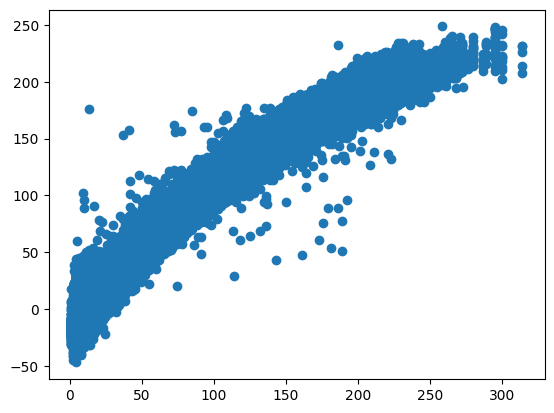

In [112]:
plt.scatter(y_test,y_pred)

In [114]:
#Plotting the residuals
Residuals=y_test-y_pred
print(Residuals)

265100    -0.180976
564814    -1.740093
62665     -6.582812
469462   -13.636063
428329   -20.141258
            ...    
273398   -23.215682
3481      -3.080149
567510    -0.999722
346162     4.787928
659061     3.485871
Name: Calories, Length: 186790, dtype: float64


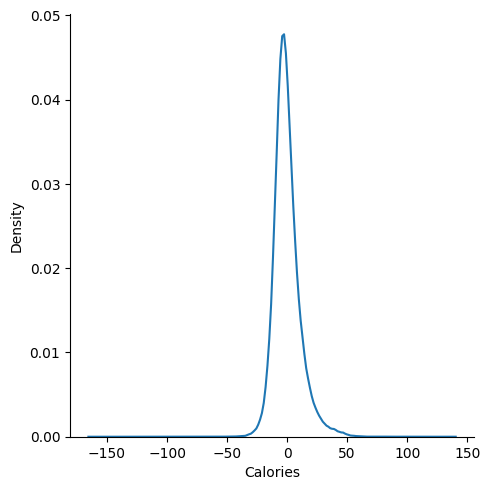

In [115]:
sns.displot(Residuals,kind='kde')

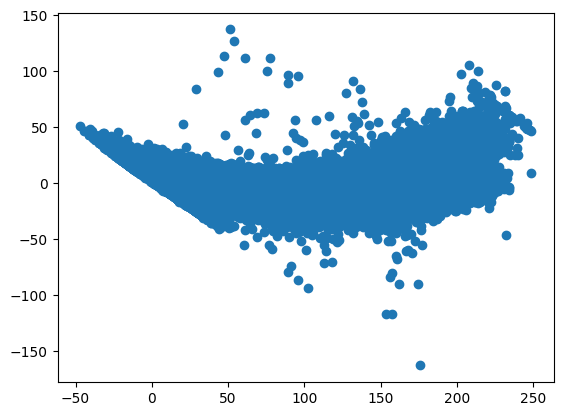

In [116]:
##Scatter plot with  respect to predictions and residuals
plt.scatter(y_pred,Residuals)

In [117]:
#Working with Test file
df_test=pd.read_csv('test.csv')

In [120]:
df_test

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,750000,male,45,177.0,81.0,7.0,87.0,39.8
1,750001,male,26,200.0,97.0,20.0,101.0,40.5
2,750002,female,29,188.0,85.0,16.0,102.0,40.4
3,750003,female,39,172.0,73.0,20.0,107.0,40.6
4,750004,female,30,173.0,67.0,16.0,94.0,40.5
...,...,...,...,...,...,...,...,...
249995,999995,female,56,159.0,62.0,6.0,85.0,39.4
249996,999996,male,32,202.0,101.0,3.0,84.0,38.4
249997,999997,female,31,164.0,64.0,14.0,98.0,40.1
249998,999998,female,62,158.0,61.0,25.0,106.0,40.7


In [121]:
df_test.drop("id",axis=1,inplace=True)

In [122]:
df_test

,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,male,45,177.0,81.0,7.0,87.0,39.8
1,male,26,200.0,97.0,20.0,101.0,40.5
2,female,29,188.0,85.0,16.0,102.0,40.4
3,female,39,172.0,73.0,20.0,107.0,40.6
4,female,30,173.0,67.0,16.0,94.0,40.5
...,...,...,...,...,...,...,...
249995,female,56,159.0,62.0,6.0,85.0,39.4
249996,male,32,202.0,101.0,3.0,84.0,38.4
249997,female,31,164.0,64.0,14.0,98.0,40.1
249998,female,62,158.0,61.0,25.0,106.0,40.7


In [123]:
##Create an intance of one hot encoder
test_encoder=OneHotEncoder()
##perform fit and transform
test_encoded=test_encoder.fit_transform(df_test[['Sex']]).toarray()
test_df=pd.DataFrame(test_encoded,columns=test_encoder.get_feature_names_out())

In [125]:
test_df=pd.concat([test_df,df_test],axis=1)

In [126]:
test_df

,Sex_female,Sex_male,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,0.0,1.0,male,45,177.0,81.0,7.0,87.0,39.8
1,0.0,1.0,male,26,200.0,97.0,20.0,101.0,40.5
2,1.0,0.0,female,29,188.0,85.0,16.0,102.0,40.4
3,1.0,0.0,female,39,172.0,73.0,20.0,107.0,40.6
4,1.0,0.0,female,30,173.0,67.0,16.0,94.0,40.5
...,...,...,...,...,...,...,...,...,...
249995,1.0,0.0,female,56,159.0,62.0,6.0,85.0,39.4
249996,0.0,1.0,male,32,202.0,101.0,3.0,84.0,38.4
249997,1.0,0.0,female,31,164.0,64.0,14.0,98.0,40.1
249998,1.0,0.0,female,62,158.0,61.0,25.0,106.0,40.7


In [127]:
test_df.drop("Sex",axis=1,inplace=True)

In [128]:
test_df

,Sex_female,Sex_male,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,0.0,1.0,45,177.0,81.0,7.0,87.0,39.8
1,0.0,1.0,26,200.0,97.0,20.0,101.0,40.5
2,1.0,0.0,29,188.0,85.0,16.0,102.0,40.4
3,1.0,0.0,39,172.0,73.0,20.0,107.0,40.6
4,1.0,0.0,30,173.0,67.0,16.0,94.0,40.5
...,...,...,...,...,...,...,...,...
249995,1.0,0.0,56,159.0,62.0,6.0,85.0,39.4
249996,0.0,1.0,32,202.0,101.0,3.0,84.0,38.4
249997,1.0,0.0,31,164.0,64.0,14.0,98.0,40.1
249998,1.0,0.0,62,158.0,61.0,25.0,106.0,40.7


In [129]:
X_test_check=scaler.fit_transform(test_df)

In [131]:
y_pred=regression.predict(X_test_check)

In [ ]:
new=pd.DataFrame(y_pred)
data_train=pd.DataFrame(X_test_check)

In [150]:
new.to_csv("Result.csv")

array([[  0. ,   1. ,  45. , ...,   7. ,  87. ,  39.8],
       [  0. ,   1. ,  26. , ...,  20. , 101. ,  40.5],
       [  1. ,   0. ,  29. , ...,  16. , 102. ,  40.4],
       ...,
       [  1. ,   0. ,  31. , ...,  14. ,  98. ,  40.1],
       [  1. ,   0. ,  62. , ...,  25. , 106. ,  40.7],
       [  0. ,   1. ,  31. , ...,  15. ,  98. ,  39.9]], shape=(250000, 8))

0         150.0
1          34.0
2          29.0
3         140.0
4         146.0
          ...  
749995    230.0
749996     96.0
749997    221.0
749998    109.0
749999    103.0
Name: Calories, Length: 747159, dtype: float64